
# <span style="color:rgb(213,80,0)">Generate Figures 8 and 9 of the paper "Choice of trimming proportion and number of clusters in robust clustering based on trimming"  </span>

### Luis A. García\-Escudero, Christian Hennig, Agustin Mayo Iscar,  Gianluca Morelli, Marco Riani,

Remark: we assume that you have FSDA installed, at least version 8.7.7.6.


In order to install FSDA, in the Home menu click on Add\-Ons and search for FSDA.

## Covid data

In [1]:
% Load the covid data and make sure that FSDA is installed
try
    load covid.mat
catch
    error('FSDA:missingFSDA','FSDA toolbox is not installed')
end

Y=covid{:,1:6};
id=covid{:,7};


### Create Figure 8


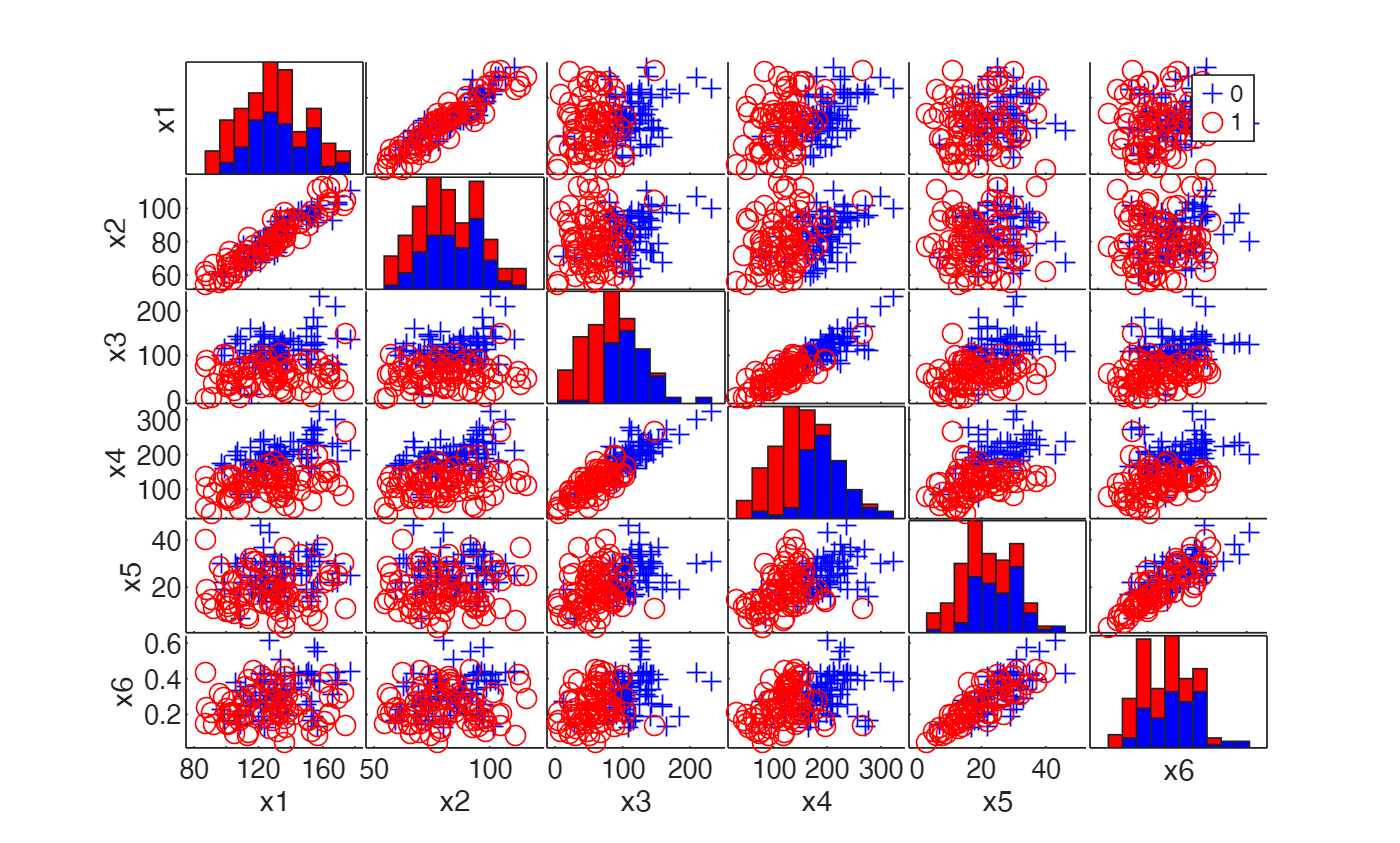

In [2]:
% Pairs plot for the COVID data set
spmplot(covid(:,1:6),'group',id);

### Create the table of p\-values

In [3]:

k = 1:5; % number of groups to test
alphaTrim = 0.00:0.025:0.2; % level of trimmin to test
cc = 128; % restriction factor
nsamp =  1000; % number of  subsets
nsimul = 100; % number of replicates
crit = 0.1; % p-value threshold

bands=struct;
bands.nsimul=nsimul;
%bands.outliersFromUniform = 1;
bands.crit=crit;
[outCTL] = ctlcurves(Y(:,1:end), 'alpha',alphaTrim,'kk',k,'bands',bands, 'restrfactor',cc, 'nsamp',nsamp,'plots',0);

k=1
k=2
k=3
k=4
k=5
Bands k=1
Bands k=2
Bands k=3
Bands k=4
Bands k=5

In [4]:
disp('Show the Values of p_{k,α}')

Show the Values of p_{k,α}

In [5]:
disp(outCTL.LRTpval)

                  alpha=0    alpha=0.025    alpha=0.05    alpha=0.075    alpha=0.1    alpha=0.125    alpha=0.15    alpha=0.175    alpha=0.2
                  _______    ___________    __________    ___________    _________    ___________    __________    ___________    _________
    k=1_vs_k=2        0            0              0             0             0             0              0             0             0   
    k=2_vs_k=3        0            0              0             0             0             0              0             0             0   
    k=3_vs_k=4        0         0.01           0.07          0.32          0.92          0.06           0.14          0.07          0.37   
    k=4_vs_k=5     0.87         0.23           0.39          0.12          0.05          0.42           0.21           0.5          0.37

In [6]:

[~,index]=unique(outCTL.LRTtentSolt.k,'stable');
Solt=outCTL.LRTtentSolt(index,:);
Sol=outCTL.LRTtentSol(index,:);
SolIdx=outCTL.LRTtentSolIDX(:,index);
disp('Show the list of tentative solutions automatically extracted')

Show the list of tentative solutions automatically extracted

In [7]:
disp(Solt(:,1:3))

            index    k    alpha
            _____    _    _____
    Sol1      1      4        0
    Sol2      2      3    0.075




Remark: note that in the live version the legends are clickable and it is possible to hide/show the single groups

### Show the solutions automatically found (Figure 9)


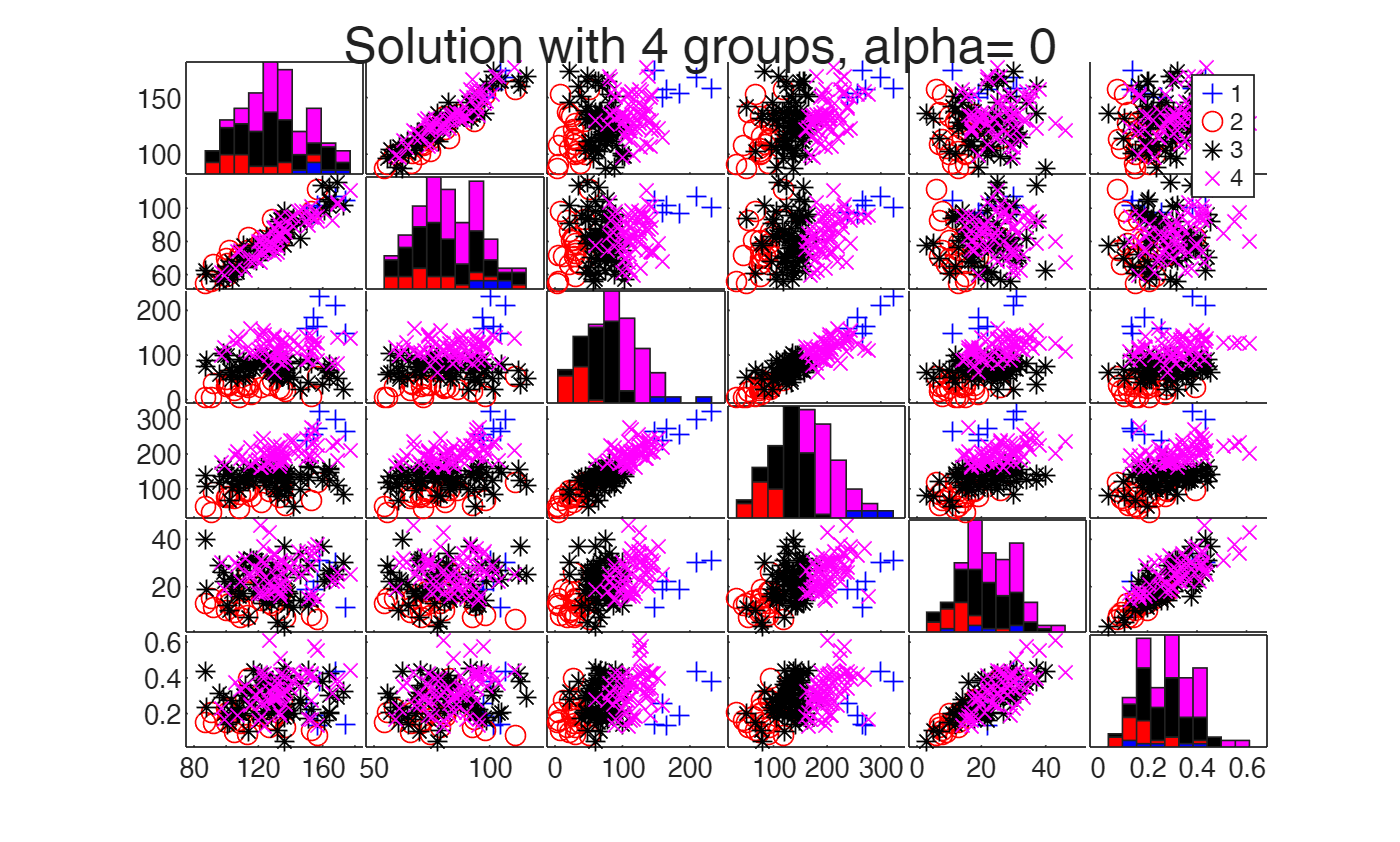


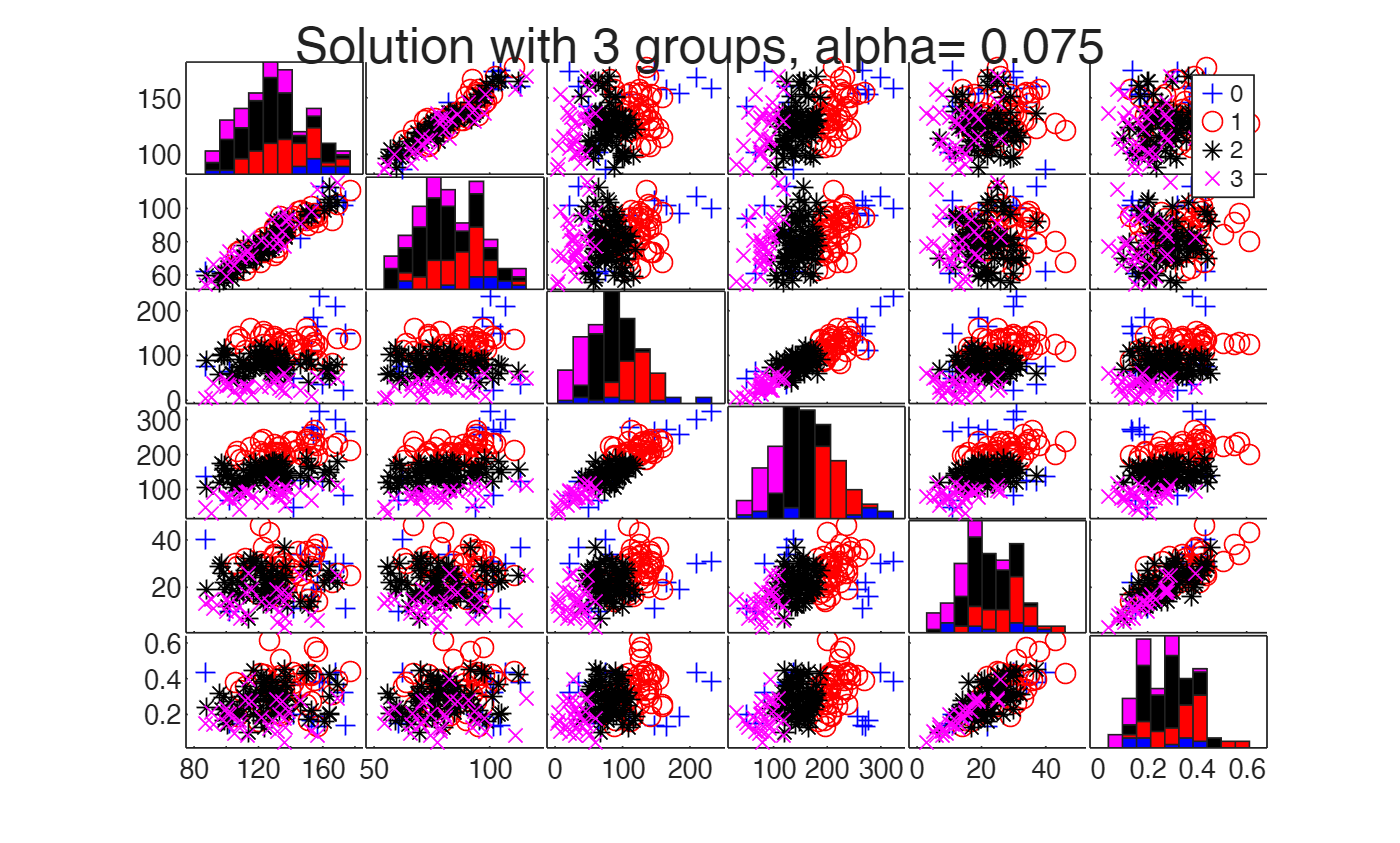

In [8]:
for j=Sol(:,2)'
    solj=Sol(:,2)==j;

    spmplot(Y,'group',SolIdx(:,solj) ,'tag',['pl' num2str(j)]);
    sgtitle(['Solution with ' num2str(Sol(solj,2)) ' groups, alpha= ' num2str(Sol(solj,3))])
end




!!!EndOutputRegion!!!